# Librerias y descarga de datos

In [ ]:
%cd
%cd ..

/root
/


In [ ]:
!pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
import mlflow
import os
from getpass import getpass

REPO_NAME= "PerrooGato"
REPO_OWNER= "DRACDARKTIME"
USER_NAME = "DRACDARKTIME"
PASSWORD = '1f3b05484244f9b77c27f8fb5d43a583f1ea46f2'

os.environ['MLFLOW_TRACKING_USERNAME'] = USER_NAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = PASSWORD
mlflow.set_tracking_uri(f'https://dagshub.com/{REPO_OWNER}/{REPO_NAME}.mlflow')

In [ ]:
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

--2024-04-23 02:15:25--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.220.168, 52.219.121.56, 52.219.216.80, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.220.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip’

celeba.zip          100%[===================>]   1.34G  20.3MB/s    in 69s     

2024-04-23 02:16:35 (19.9 MB/s) - ‘celeba.zip’ saved [1443490838/1443490838]



In [ ]:
!unzip celeba.zip

Streaming output truncated to the last 5000 lines.
 extracting: img_align_celeba/197600.jpg  
 extracting: img_align_celeba/197601.jpg  
 extracting: img_align_celeba/197602.jpg  
 extracting: img_align_celeba/197603.jpg  
 extracting: img_align_celeba/197604.jpg  
 extracting: img_align_celeba/197605.jpg  
 extracting: img_align_celeba/197606.jpg  
 extracting: img_align_celeba/197607.jpg  
 extracting: img_align_celeba/197608.jpg  
 extracting: img_align_celeba/197609.jpg  
 extracting: img_align_celeba/197610.jpg  
 extracting: img_align_celeba/197611.jpg  
 extracting: img_align_celeba/197612.jpg  
 extracting: img_align_celeba/197613.jpg  
 extracting: img_align_celeba/197614.jpg  
 extracting: img_align_celeba/197615.jpg  
 extracting: img_align_celeba/197616.jpg  
 extracting: img_align_celeba/197617.jpg  
 extracting: img_align_celeba/197618.jpg  
 extracting: img_align_celeba/197619.jpg  
 extracting: img_align_celeba/197620.jpg  
 extracting: img_align_celeba/197621.jpg  
 ex

In [ ]:
import pandas as  pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import (
    Dense, Conv2D, MaxPooling2D, Flatten,
    Activation, Dropout,
    BatchNormalization
)
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import mlflow.keras

# Creación del modelo que identifica las características del dataset CelebA

## Procesamiento del dataset

### Creación del dataset

In [ ]:
!wget https://raw.githubusercontent.com/taki0112/StarGAN-Tensorflow/master/dataset/celebA/list_attr_celeba.txt

--2024-04-23 02:17:22--  https://raw.githubusercontent.com/taki0112/StarGAN-Tensorflow/master/dataset/celebA/list_attr_celeba.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26518425 (25M) [text/plain]
Saving to: ‘list_attr_celeba.txt’

list_attr_celeba.tx 100%[===================>]  25.29M  46.6MB/s    in 0.5s    

2024-04-23 02:17:24 (46.6 MB/s) - ‘list_attr_celeba.txt’ saved [26518425/26518425]



In [ ]:
import pathlib
import os

np.set_printoptions(precision=4)

# Eliminar el dobel espacio entre algunos datos de la tabla
with open('list_attr_celeba.txt', 'r') as f:
    print("skipping : " + f.readline())
    print("skipping headers : " + f.readline())
    with open('attr_celeba_prepared.txt' , 'w') as newf:
        for line in f:
            new_line = ' '.join(line.split())
            newf.write(new_line)
            newf.write('\n')

df = pd.read_csv('attr_celeba_prepared.txt', sep=' ', header = None)

#print("-----------")
#print(df[0].head())
#print(df.iloc[:,1:].head())
#print("----------")

files = tf.data.Dataset.from_tensor_slices(df[0])

skipping : 202599

skipping headers : 5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young 



In [ ]:
df_replaced = df.replace(-1, 0)
df = df.replace(-1, 0)

In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
202594,202595.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
202595,202596.jpg,0,0,0,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,1
202596,202597.jpg,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
202598,202599.jpg,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


### Análisis del dataset

In [ ]:
a = pd.DataFrame(df.sum())

In [ ]:
b = a[1:]

In [ ]:
b.values.reshape(40,)

array([22516, 54090, 103833, 41446, 4547, 30709, 48785, 47516, 48472,
       29983, 10312, 41572, 28803, 11663, 9459, 13193, 12716, 8499, 78390,
       92189, 84434, 97942, 8417, 23329, 169158, 57567, 8701, 56210,
       16163, 13315, 11449, 97669, 42222, 64744, 38276, 9818, 95715,
       24913, 14732, 156734], dtype=object)

In [ ]:
values = [22516, 54090, 103833, 41446, 4547, 30709, 48785, 47516, 48472,
       29983, 10312, 41572, 28803, 11663, 9459, 13193, 12716, 8499, 78390,
       92189, 84434, 97942, 8417, 23329, 169158, 57567, 8701, 56210,
       16163, 13315, 11449, 97669, 42222, 64744, 38276, 9818, 95715,
       24913, 14732, 156734]

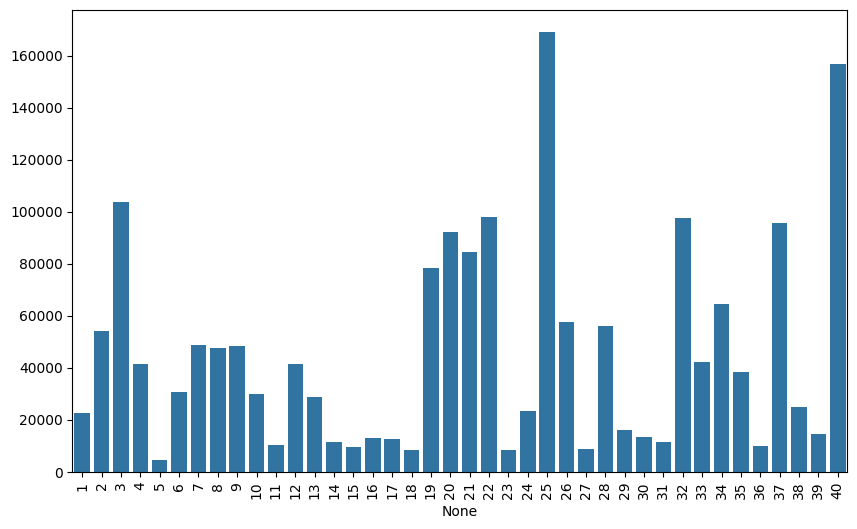

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x = b.index, y = values)
plt.xticks(rotation=90)
plt.show()
plt.savefig("Ejemplo1.jpg")

Podemos notar que hay muy pocos datos de unas cuantas variables, lo optimo seria que todos esten en 100,000, pero muy pocos estan cerca de ese valor así que descarteremos los mas bajos

In [ ]:
#5_o_Clock_Shadow     1     X   pocos datos
#Arched_Eyebrows      2     X   pocos datos
#Attractive           3     X   se descarta por no ser objetivo
#Bags_Under_Eyes      4     X   pocos datos
#Bald                 5     X   pocos datos
#Bangs                6     X   pocos datos
#Big_Lips             7     X   pocos datos
#Big_Nose             8     X   pocos datos
#Black_Hair           9     X   se hará a blanco y negro
#Blond_Hair           10    X   pocos datos
#Blurry               11    X   pocos datos
#Brown_Hair           12    X   se hará a blanco y negro
#Bushy_Eyebrows       13    X   pocos datos
#Chubby               14    X   pocos datos
#Double_Chin          15    X   pocos datos
#Eyeglasses           16    X   pocos datos
#Goatee               17    X   pocos datos
#Gray_Hair            18    X   pocos datos
#Heavy_Makeup         19    X   no necesario
#High_Cheekbones      20
#Male                 21
#Mouth_Slightly_Open  22
#Mustache             23    X   pocos datos
#Narrow_Eyes          24    X   pocos datos
#No_Beard             25    X   pocos datos
#Oval_Face            26    X   pocos datos
#Pale_Skin            27    X   pocos datos
#Pointy_Nose          28    X   pocos datos
#Receding_Hairline    29    X   pocos datos
#Rosy_Cheeks          30    X   pocos datos
#Sideburns            31    X   pocos datos
#Smiling              32
#Straight_Hair        33    X   pocos datos
#Wavy_Hair            34    X   pocos datos
#Wearing_Earrings     35    X   pocos datos
#Wearing_Hat          36    X   pocos datos
#Wearing_Lipstick     37    X   no necesario
#Wearing_Necklace     38    X   pocos datos
#Wearing_Necktie      39    X   pocos datos
#Young                40    X   pocos datos

### Creamos una mejor base de datos

In [ ]:
#High_Cheekbones, Male ,Mouth_Slightly_Open,Smiling
df= df[[20,21,22,32]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   20      202599 non-null  int64
 1   21      202599 non-null  int64
 2   22      202599 non-null  int64
 3   32      202599 non-null  int64
dtypes: int64(4)
memory usage: 6.2 MB


In [ ]:
df.tail()

,20,21,22,32
202594,0,0,0,0
202595,1,1,1,1
202596,1,1,1,1
202597,1,0,0,1
202598,0,0,0,0


In [ ]:
attributes = tf.data.Dataset.from_tensor_slices(df.iloc[:,:].to_numpy())
data = tf.data.Dataset.zip((files, attributes))
print(data)

path_to_images = 'img_align_celeba/'
def process_file(file_name, attributes):
    image = tf.io.read_file(path_to_images + file_name)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, [80, 80])
    image /= 255.0
    return image, attributes

<_ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(4,), dtype=tf.int64, name=None))>


In [ ]:
labeled_images = data.map(process_file)

tf.Tensor([1 0 1 1], shape=(4,), dtype=int64)


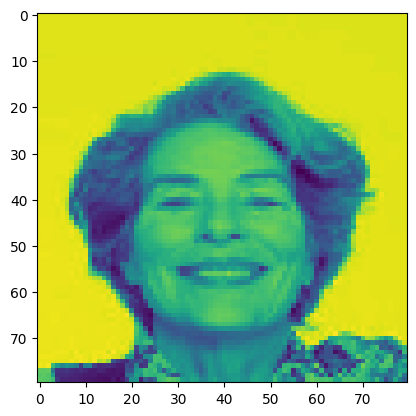

tf.Tensor([0 0 0 0], shape=(4,), dtype=int64)


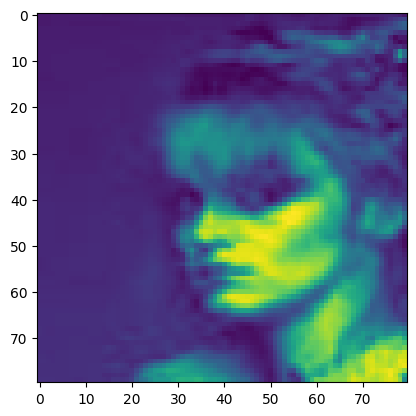

In [ ]:
for image, attri in labeled_images.skip(115).take(2):
   plt.imshow(image)
   print(attri)
   plt.show()
#High_Cheekbones, Male ,Mouth_Slightly_Open,Smiling

## División de los datos

In [ ]:
train_size = int((0.8 * len(labeled_images))/2)
val_size = int((0.1 * len(labeled_images))/2)
test_size = int(len(labeled_images)/2) - train_size - val_size
#Tomaremos solo la mitad de los datos proporcionados para que
#no se tarde tanto entrenando la red, sigue siendo una buena cantidad de datos
print(train_size)
print(val_size)
print(test_size)
print(len(labeled_images))

labeled_images=labeled_images.shuffle(len(labeled_images))

train_dataset = labeled_images.take(train_size)
val_dataset = labeled_images.skip(train_size).take(val_size)
test_dataset = labeled_images.skip(train_size + val_size).take(test_size)

batch_size = 240
train_dataset = train_dataset.shuffle(train_size).batch(batch_size)
val_dataset = val_dataset.shuffle(val_size).batch(batch_size)
test_dataset = test_dataset.shuffle(test_size).batch(batch_size)

81039
10129
10131
202599


## Creación del modelo multiclase para CelabA

In [ ]:
params = {
    'learning_rate' : 0.0001,
    'epochs' : 70,
    'batch_size' : 240,
    'beta_1' : 0.999,
    'beta_2' : 0.9,
    'epsilon': 1e-7,
    'lambda1' : 1e-5,
    'lambda2': 1e-5,
    'porcentaje':0.20,
    'optimizer':'Adam',
    'loss':'binary_crossentropy'
}

In [ ]:
inputs = keras.Input(shape=(80, 80, 1))

x = Conv2D(32,(3,3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64,(3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(128,(3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x = Dropout(params['porcentaje'])(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dropout(0.3)(x)
#x = Dense(110,activation='relu')(x)
#x = Dropout(0.3)(x)
x = Dense(200,activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(4, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 78, 78, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 78, 78, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 37, 37, 64)        256   

In [ ]:
# specify the path where you want to save the model
filepath = "best_model_4.hdf5"

# initialize the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_accuracy',
                          mode='max',
                          restore_best_weights=True,
                          patience=15,verbose=1)
mlflow.set_experiment(experiment_name="Personas_atributus")
mlflow.tensorflow.autolog()

In [ ]:
mlflow.start_run()
model.compile(loss=params['loss'],
              optimizer=Adam(
              learning_rate=params['learning_rate'],
              beta_1=params['beta_1'],
              beta_2=params['beta_2'],
              epsilon=params['epsilon'],
              amsgrad=True
              ),
              metrics=['accuracy'])

history= model.fit(train_dataset,
                   batch_size=params['batch_size'],
                   epochs=params['epochs'],
                   validation_data=val_dataset,
                   callbacks=[checkpoint,earlystop],
                   verbose=1
                   )
mlflow.log_artifact('best_model_4.hdf5', "models")
mlflow.end_run()

### Seguiremos entrenando el mejor modelo de CelebA por más epocas

In [ ]:
os.environ["MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR"] = "false"
mlflow.artifacts.download_artifacts(run_id= '951213f779704f638c0bcbb8728334f9')

'/tmp/tmpmokxtfjx/'

In [ ]:
import urllib3
http = urllib3.PoolManager(num_pools=50)

In [ ]:
from keras.models import load_model
model2 = load_model("/tmp/tmpmokxtfjx/models/best_model_4.hdf5")

In [ ]:
# specify the path where you want to save the model
filepath = "best_model_4.hdf5"

# initialize the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_binary_accuracy', verbose=1, save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_binary_accuracy',
                          mode='max',
                          restore_best_weights=True,
                          patience=30,verbose=1)
mlflow.set_experiment(experiment_name="Personas_atributus")
mlflow.tensorflow.autolog()
mlflow.start_run()
model2.compile(loss=params['loss'],
              optimizer=Adam(
              learning_rate=params['learning_rate'],
              beta_1=params['beta_1'],
              beta_2=params['beta_2'],
              epsilon=params['epsilon'],
              amsgrad=True
              ),
              metrics=['binary_accuracy'])

history= model2.fit(train_dataset,
                   batch_size=params['batch_size'],
                   epochs=params['epochs'],
                   validation_data=val_dataset,
                   callbacks=[checkpoint,earlystop],
                   verbose=1
                   )
mlflow.log_artifact('best_model_4.hdf5', "models")
mlflow.end_run()


2024/04/19 13:58:40 INFO mlflow.types.utils: MLflow 2.9.0 introduces model signature with new data types for lists and dictionaries. For input such as Dict[str, Union[scalars, List, Dict]], we infer dictionary values types as `List -> Array` and `Dict -> Object`. 
2024/04/19 13:59:12 INFO mlflow.types.utils: MLflow 2.9.0 introduces model signature with new data types for lists and dictionaries. For input such as Dict[str, Union[scalars, List, Dict]], we infer dictionary values types as `List -> Array` and `Dict -> Object`. 


Epoch 1/70
338/338 [==============================] - ETA: 0s - loss: 0.1708 - binary_accuracy: 0.9296
Epoch 1: val_binary_accuracy improved from -inf to 0.94118, saving model to best_model_4.hdf5
338/338 [==============================] - 460s 1s/step - loss: 0.1708 - binary_accuracy: 0.9296 - val_loss: 0.1456 - val_binary_accuracy: 0.9412
Epoch 2/70
338/338 [==============================] - ETA: 0s - loss: 0.1683 - binary_accuracy: 0.9309
Epoch 2: val_binary_accuracy improved from 0.94118 to 0.94303, saving model to best_model_4.hdf5
338/338 [==============================] - 411s 1s/step - loss: 0.1683 - binary_accuracy: 0.9309 - val_loss: 0.1466 - val_binary_accuracy: 0.9430
Epoch 3/70
338/338 [==============================] - ETA: 0s - loss: 0.1679 - binary_accuracy: 0.9306
Epoch 3: val_binary_accuracy did not improve from 0.94303


338/338 [==============================] - 420s 1s/step - loss: 0.1679 - binary_accuracy: 0.9306 - val_loss: 0.1434 - val_binary_accuracy: 0.9421
Epoch 4/70
338/338 [==============================] - ETA: 0s - loss: 0.1655 - binary_accuracy: 0.9324
Epoch 4: val_binary_accuracy improved from 0.94303 to 0.94449, saving model to best_model_4.hdf5
338/338 [==============================] - 396s 1s/step - loss: 0.1655 - binary_accuracy: 0.9324 - val_loss: 0.1396 - val_binary_accuracy: 0.9445
Epoch 5/70
338/338 [==============================] - ETA: 0s - loss: 0.1646 - binary_accuracy: 0.9319
Epoch 5: val_binary_accuracy did not improve from 0.94449
338/338 [==============================] - 405s 1s/step - loss: 0.1646 - binary_accuracy: 0.9319 - val_loss: 0.1406 - val_binary_accuracy: 0.9444
Epoch 6/70
338/338 [==============================] - ETA: 0s - loss: 0.1640 - binary_accuracy: 0.9324
Epoch 6: val_binary_accuracy improved from 0.94449 to 0.94605, saving model to best_model_4.hdf5


338/338 [==============================] - 405s 1s/step - loss: 0.1640 - binary_accuracy: 0.9324 - val_loss: 0.1356 - val_binary_accuracy: 0.9460
Epoch 7/70
338/338 [==============================] - ETA: 0s - loss: 0.1619 - binary_accuracy: 0.9332
Epoch 7: val_binary_accuracy improved from 0.94605 to 0.94674, saving model to best_model_4.hdf5
338/338 [==============================] - 380s 1s/step - loss: 0.1619 - binary_accuracy: 0.9332 - val_loss: 0.1362 - val_binary_accuracy: 0.9467
Epoch 8/70
338/338 [==============================] - ETA: 0s - loss: 0.1603 - binary_accuracy: 0.9338
Epoch 8: val_binary_accuracy did not improve from 0.94674
338/338 [==============================] - 401s 1s/step - loss: 0.1603 - binary_accuracy: 0.9338 - val_loss: 0.1370 - val_binary_accuracy: 0.9452
Epoch 9/70
338/338 [==============================] - ETA: 0s - loss: 0.1597 - binary_accuracy: 0.9340
Epoch 9: val_binary_accuracy did not improve from 0.94674


338/338 [==============================] - 395s 1s/step - loss: 0.1597 - binary_accuracy: 0.9340 - val_loss: 0.1342 - val_binary_accuracy: 0.9460
Epoch 10/70
338/338 [==============================] - ETA: 0s - loss: 0.1604 - binary_accuracy: 0.9334
Epoch 10: val_binary_accuracy did not improve from 0.94674
338/338 [==============================] - 389s 1s/step - loss: 0.1604 - binary_accuracy: 0.9334 - val_loss: 0.1375 - val_binary_accuracy: 0.9443
Epoch 11/70
338/338 [==============================] - ETA: 0s - loss: 0.1597 - binary_accuracy: 0.9337
Epoch 11: val_binary_accuracy improved from 0.94674 to 0.94723, saving model to best_model_4.hdf5


338/338 [==============================] - 394s 1s/step - loss: 0.1597 - binary_accuracy: 0.9337 - val_loss: 0.1349 - val_binary_accuracy: 0.9472
Epoch 12/70
338/338 [==============================] - ETA: 0s - loss: 0.1572 - binary_accuracy: 0.9352
Epoch 12: val_binary_accuracy did not improve from 0.94723
338/338 [==============================] - 397s 1s/step - loss: 0.1572 - binary_accuracy: 0.9352 - val_loss: 0.1342 - val_binary_accuracy: 0.9464
Epoch 13/70
338/338 [==============================] - ETA: 0s - loss: 0.1580 - binary_accuracy: 0.9351
Epoch 13: val_binary_accuracy improved from 0.94723 to 0.94906, saving model to best_model_4.hdf5
338/338 [==============================] - 379s 1s/step - loss: 0.1580 - binary_accuracy: 0.9351 - val_loss: 0.1319 - val_binary_accuracy: 0.9491
Epoch 14/70
338/338 [==============================] - ETA: 0s - loss: 0.1550 - binary_accuracy: 0.9362
Epoch 14: val_binary_accuracy did not improve from 0.94906
338/338 [=========================

338/338 [==============================] - 383s 1s/step - loss: 0.1518 - binary_accuracy: 0.9374 - val_loss: 0.1235 - val_binary_accuracy: 0.9505
Epoch 25/70
338/338 [==============================] - ETA: 0s - loss: 0.1517 - binary_accuracy: 0.9376
Epoch 25: val_binary_accuracy improved from 0.95138 to 0.95273, saving model to best_model_4.hdf5
338/338 [==============================] - 405s 1s/step - loss: 0.1517 - binary_accuracy: 0.9376 - val_loss: 0.1234 - val_binary_accuracy: 0.9527
Epoch 26/70
338/338 [==============================] - ETA: 0s - loss: 0.1490 - binary_accuracy: 0.9382
Epoch 26: val_binary_accuracy improved from 0.95273 to 0.95306, saving model to best_model_4.hdf5
338/338 [==============================] - 385s 1s/step - loss: 0.1490 - binary_accuracy: 0.9382 - val_loss: 0.1198 - val_binary_accuracy: 0.9531
Epoch 27/70
338/338 [==============================] - ETA: 0s - loss: 0.1496 - binary_accuracy: 0.9379
Epoch 27: val_binary_accuracy did not improve from 0.9

338/338 [==============================] - 399s 1s/step - loss: 0.1414 - binary_accuracy: 0.9413 - val_loss: 0.1115 - val_binary_accuracy: 0.9573
Epoch 44/70
338/338 [==============================] - ETA: 0s - loss: 0.1399 - binary_accuracy: 0.9420
Epoch 44: val_binary_accuracy improved from 0.95730 to 0.95784, saving model to best_model_4.hdf5
338/338 [==============================] - 403s 1s/step - loss: 0.1399 - binary_accuracy: 0.9420 - val_loss: 0.1118 - val_binary_accuracy: 0.9578
Epoch 45/70
338/338 [==============================] - ETA: 0s - loss: 0.1404 - binary_accuracy: 0.9413
Epoch 45: val_binary_accuracy improved from 0.95784 to 0.95876, saving model to best_model_4.hdf5
338/338 [==============================] - 399s 1s/step - loss: 0.1404 - binary_accuracy: 0.9413 - val_loss: 0.1087 - val_binary_accuracy: 0.9588
Epoch 46/70
338/338 [==============================] - ETA: 0s - loss: 0.1387 - binary_accuracy: 0.9428
Epoch 46: val_binary_accuracy did not improve from 0.9

338/338 [==============================] - 385s 1s/step - loss: 0.1372 - binary_accuracy: 0.9430 - val_loss: 0.1059 - val_binary_accuracy: 0.9599
Epoch 53/70
338/338 [==============================] - ETA: 0s - loss: 0.1371 - binary_accuracy: 0.9431
Epoch 53: val_binary_accuracy improved from 0.95994 to 0.96051, saving model to best_model_4.hdf5
338/338 [==============================] - 393s 1s/step - loss: 0.1371 - binary_accuracy: 0.9431 - val_loss: 0.1051 - val_binary_accuracy: 0.9605
Epoch 54/70
338/338 [==============================] - ETA: 0s - loss: 0.1367 - binary_accuracy: 0.9429
Epoch 54: val_binary_accuracy did not improve from 0.96051
338/338 [==============================] - 392s 1s/step - loss: 0.1367 - binary_accuracy: 0.9429 - val_loss: 0.1063 - val_binary_accuracy: 0.9601
Epoch 55/70
338/338 [==============================] - ETA: 0s - loss: 0.1355 - binary_accuracy: 0.9437
Epoch 55: val_binary_accuracy improved from 0.96051 to 0.96103, saving model to best_model_4.

338/338 [==============================] - 385s 1s/step - loss: 0.1340 - binary_accuracy: 0.9444 - val_loss: 0.1007 - val_binary_accuracy: 0.9616
Epoch 58/70
338/338 [==============================] - ETA: 0s - loss: 0.1349 - binary_accuracy: 0.9440
Epoch 58: val_binary_accuracy improved from 0.96164 to 0.96197, saving model to best_model_4.hdf5
338/338 [==============================] - 409s 1s/step - loss: 0.1349 - binary_accuracy: 0.9440 - val_loss: 0.1027 - val_binary_accuracy: 0.9620
Epoch 59/70
338/338 [==============================] - ETA: 0s - loss: 0.1336 - binary_accuracy: 0.9440
Epoch 59: val_binary_accuracy improved from 0.96197 to 0.96261, saving model to best_model_4.hdf5
338/338 [==============================] - 427s 1s/step - loss: 0.1336 - binary_accuracy: 0.9440 - val_loss: 0.1001 - val_binary_accuracy: 0.9626
Epoch 60/70
338/338 [==============================] - ETA: 0s - loss: 0.1335 - binary_accuracy: 0.9449
Epoch 60: val_binary_accuracy did not improve from 0.9

338/338 [==============================] - 387s 1s/step - loss: 0.1311 - binary_accuracy: 0.9454 - val_loss: 0.0988 - val_binary_accuracy: 0.9642
Epoch 69/70
338/338 [==============================] - ETA: 0s - loss: 0.1302 - binary_accuracy: 0.9463
Epoch 69: val_binary_accuracy did not improve from 0.96451
338/338 [==============================] - 383s 1s/step - loss: 0.1302 - binary_accuracy: 0.9463 - val_loss: 0.0988 - val_binary_accuracy: 0.9628
Epoch 70/70
338/338 [==============================] - ETA: 0s - loss: 0.1300 - binary_accuracy: 0.9465
Epoch 70: val_binary_accuracy did not improve from 0.96451
1/1 [==============================] - 0s 426ms/step


2024/04/19 22:18:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


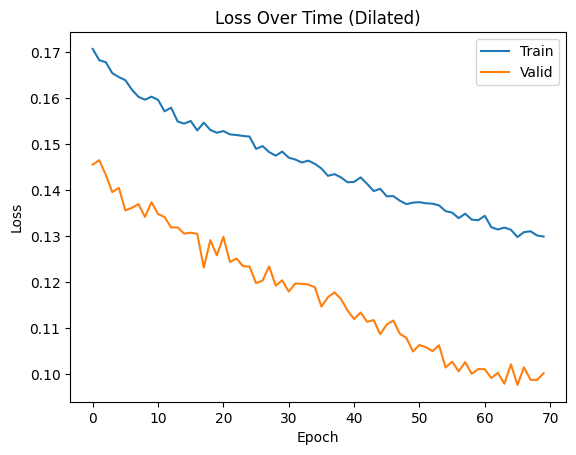

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time (Dilated)')
plt.legend(['Train','Valid'])

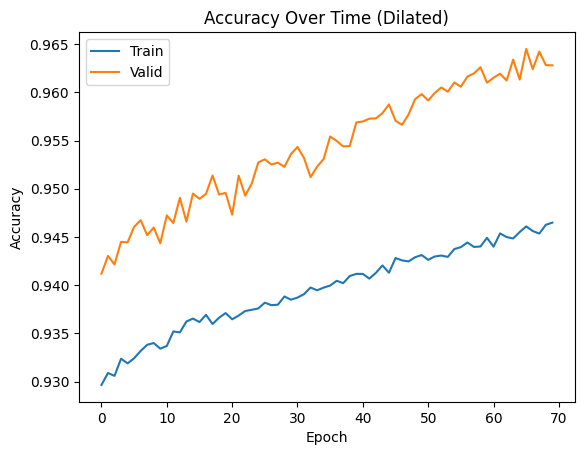

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time (Dilated)')
plt.legend(['Train','Valid'])

# Modelo para Reconocimiento Facial

## Creación del dataset para Reconocimiento Facial

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=1.0,
    horizontal_flip=True,
    validation_split = 0.2
)

In [ ]:
datagen_test = ImageDataGenerator(
    rescale = 1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/reconocimiento_facial

/content/drive/MyDrive/reconocimiento_facial


Tenemos dos carpetas con 353 fotos cada una para el entrenamiento

In [ ]:
!ls dataset/Jose_Ramon/ | wc -l
!ls dataset/desconocidos/ | wc -l

353
353


In [ ]:
data_gen_entrenamiento = datagen.flow_from_directory('dataset/',
                                                     target_size=(80,80),
                                                     batch_size=32, shuffle=True,
                                                     subset='training',
                                                     color_mode='grayscale',
                                                     class_mode='binary'
                                                     )
data_gen_validation = datagen.flow_from_directory('dataset/',
                                                     target_size=(80,80),
                                                     batch_size=32, shuffle=True,
                                                     subset='validation',
                                                     color_mode='grayscale',
                                                     class_mode='binary'
                                                     )
data_gen_test = datagen_test.flow_from_directory('dataset_test/',
                                                     target_size=(80,80),shuffle=True,
                                                     color_mode='grayscale',
                                                     class_mode='binary'
                                                     )

Found 565 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [ ]:
epoch_steps = 565 // params['batch_size']
test_steps = 140 // params['batch_size']

In [ ]:
epoch_steps, test_steps

(17, 4)

1.0


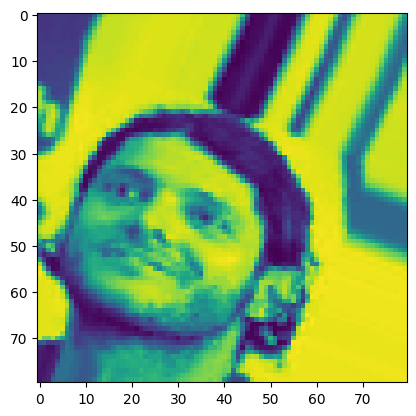

In [ ]:
for input, target in data_gen_entrenamiento:
    plt.imshow(input[0])
    print(target[0])
    break

0.0


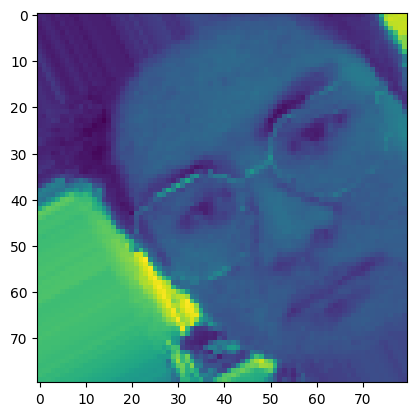

In [ ]:
for input, target in data_gen_entrenamiento:
    plt.imshow(input[0])
    print(target[0])
    break

## Modelo para Tranfer-Learning

In [ ]:
mlflow.artifacts.download_artifacts(run_id= '56838304caed4fd0a996a8a579ac7bef')

2024/04/22 17:42:23 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


'/tmp/tmpgbmpwxgv/'

Congelamos los parámetros del modelo con **trainable = False**

In [ ]:
pretrained_model = tf.keras.models.load_model('/tmp/tmpgbmpwxgv/models/best_model_4.hdf5')

In [ ]:
# Congelamos todas las capas del modelo pre-entrenado
for layer in pretrained_model.layers:
    layer.trainable = False

# Obtenemos todas las capas excepto las últimas 6
new_output = pretrained_model.layers[-6].output

# Creamos un nuevo modelo excluyendo las últimas 6 capas
new_model = tf.keras.Model(inputs=pretrained_model.input, outputs=new_output)

# Vemos la estructura del nuevo modelo
new_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 78, 78, 32)        320       
                                                                 
 batch_normalization_9 (Bat  (None, 78, 78, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 39, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 batch_normalization_10 (Ba  (None, 37, 37, 64)        256 

In [ ]:
kernel_reg = l1_l2(1e-02, 1e-02)
model = Sequential()
model.add(new_model)
model.add(Dropout(0.50))
model.add(Dense(300, activation='relu', kernel_regularizer=kernel_reg))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=kernel_reg))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_7 (Functional)        (None, 8192)              93568     
                                                                 
 dropout_11 (Dropout)        (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 300)               2457900   
                                                                 
 dense_19 (Dense)            (None, 1)                 301       
                                                                 
Total params: 2551769 (9.73 MB)
Trainable params: 2458201 (9.38 MB)
Non-trainable params: 93568 (365.50 KB)
_________________________________________________________________


Podemos notar que solo tenemos 1,281 parámetros entrenables de los 2,259,265 en total

In [ ]:
params = {
    'learning_rate' : 0.0001,
    'epochs' : 70,
    'batch_size' : 32,
    'beta_1' : 0.999,
    'beta_2' : 0.9,
    'epsilon': 1e-7,
    'lambda1' : 1e-5,
    'lambda2': 1e-5,
    'porcentaje':0.20,
    'optimizer':'Adam',
    'loss':'binary_crossentropy'
}

In [ ]:
model.compile(
    optimizer='adam',
    loss=params['loss'],
    metrics=['accuracy']
)

Como queremos entrenar una red que nos identifique a nosotros entonces necesitamos que la salida sea un red densa de una neurona.
una salida para nosotros y la otra para personas desconocidas

Ahora vamos a entrenar al modelo para que aprenda a distinguir rostros de personas

In [ ]:
mlflow.end_run()

In [ ]:
filepath = "mejor_modelo_fr.hdf5"
    #Checkpoint to save the model
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    #Early stopping
earlystop = EarlyStopping(monitor='val_accuracy',mode='max',restore_best_weights=True,patience=30,verbose=1)
mlflow.set_experiment(experiment_name="Reconocimiento_cara")
mlflow.tensorflow.autolog()
mlflow.start_run(run_name=f"eta={params['learning_rate']}")
historical = model.fit(data_gen_entrenamiento,
    steps_per_epoch=epoch_steps,
    validation_steps=test_steps,
    epochs = 100,
    validation_data=data_gen_validation,
    verbose = 1,
    callbacks=[checkpoint, earlystop]
)
mlflow.log_artifact('mejor_modelo_fr.hdf5', "models")
mlflow.end_run()

2024/04/22 21:47:30 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2024/04/22 21:47:30 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/100
17/17 [==============================] - ETA: 0s - loss: 200.1009 - accuracy: 0.9362
Epoch 1: val_accuracy improved from -inf to 0.91406, saving model to mejor_modelo_fr.hdf5
17/17 [==============================] - 8s 426ms/step - loss: 200.1009 - accuracy: 0.9362 - val_loss: 82.9655 - val_accuracy: 0.9141
Epoch 2/100
17/17 [==============================] - ETA: 0s - loss: 43.3199 - accuracy: 0.9962
Epoch 2: val_accuracy improved from 0.91406 to 0.92188, saving model to mejor_modelo_fr.hdf5
17/17 [==============================] - 7s 421ms/step - loss: 43.3199 - accuracy: 0.9962 - val_loss: 23.6544 - val_accuracy: 0.9219
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 14.7467 - accuracy: 0.9925
Epoch 3: val_accuracy did not improve from 0.92188
17/17 [==============================] - 6s 362ms/step - loss: 14.7467 - accuracy: 0.9925 - val_loss: 8.9865 - val_accuracy: 0.9062
Epoch 4/100
17/17 [==============================] - ETA: 0s - loss: 7.2868 - 

2024/04/22 21:51:15 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2024/04/22 21:51:15 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


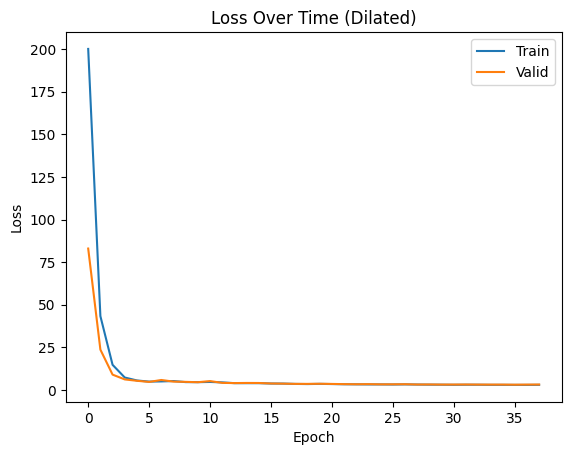

In [ ]:
plt.plot(historical.history['loss'])
plt.plot(historical.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time (Dilated)')
plt.legend(['Train','Valid'])

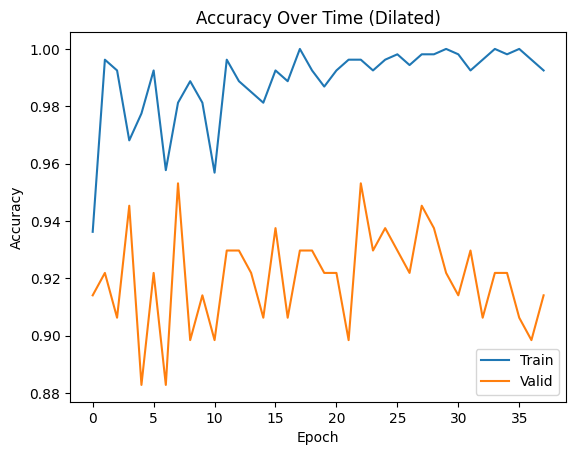

In [ ]:
plt.plot(historical.history['accuracy'])
plt.plot(historical.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time (Dilated)')
plt.legend(['Train','Valid'])

In [ ]:
model.evaluate(data_gen_test)

7/7 [==============================] - 1s 144ms/step - loss: 4.8121 - accuracy: 0.9950


[4.812066555023193, 0.9950248599052429]

In [ ]:
ruta_imagen = '/rotro_14.jpg'

In [ ]:
imagen_color = tf.io.read_file(ruta_imagen)
imagen_color = tf.image.decode_jpeg(imagen_color, channels=1)  # Leer como imagen RGB
nuevo_ancho = 80
nuevo_alto = 80
imagen_redimensionada = tf.image.resize(imagen_color, [nuevo_ancho, nuevo_alto])
#imagen_color = tf.cast(imagen_redimensionada, tf.uint8)  # Convertir a tipo de dato uint8
imagen = tf.expand_dims(imagen_redimensionada, axis=0)


In [ ]:
imagen/225

<tf.Tensor: shape=(1, 80, 80, 1), dtype=float32, numpy=
array([[[[0.7649],
         [0.7689],
         [0.7687],
         ...,
         [0.2249],
         [0.3042],
         [0.3139]],

        [[0.7631],
         [0.7676],
         [0.774 ],
         ...,
         [0.2447],
         [0.2679],
         [0.2933]],

        [[0.7689],
         [0.7689],
         [0.7656],
         ...,
         [0.2178],
         [0.2453],
         [0.256 ]],

        ...,

        [[0.7113],
         [0.7089],
         [0.7156],
         ...,
         [0.7544],
         [0.7593],
         [0.7471]],

        [[0.7142],
         [0.7142],
         [0.7187],
         ...,
         [0.7556],
         [0.7565],
         [0.7524]],

        [[0.7151],
         [0.7151],
         [0.7151],
         ...,
         [0.7533],
         [0.7507],
         [0.7592]]]], dtype=float32)>

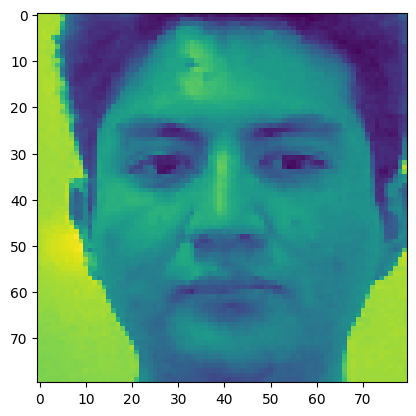

In [ ]:
plt.imshow(imagen_redimensionada)

In [ ]:
model.predict(imagen/225)

1/1 [==============================] - 0s 119ms/step


array([[0.0446]], dtype=float32)

In [ ]:
b[0][0]

0.02578904

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Directorio que contiene tus imágenes
directorio = '/content/drive/MyDrive/reconocimiento_facial/dataset_test/Jose_Ramon2'

# Obtener la lista de nombres de archivo de imágenes en el directorio
archivos = os.listdir(directorio)
a = []
# Iterar sobre los archivos y mostrar cada imagen
for archivo in archivos:
    # Obtener la ruta completa de la imagen
    ruta_imagen = os.path.join(directorio, archivo)
    imagen_color = tf.io.read_file(ruta_imagen)
    imagen_color = tf.image.decode_jpeg(imagen_color, channels=1)  # Leer como imagen RGB
    nuevo_ancho = 80
    nuevo_alto = 80
    imagen_redimensionada = tf.image.resize(imagen_color, [nuevo_ancho, nuevo_alto])
    imagen_color = tf.cast(imagen_redimensionada, tf.uint8)  # Convertir a tipo de dato uint8
    imagen = tf.expand_dims(imagen_color, axis=0)
    b = model.predict(imagen/225)
    a.append(b[0][0])

1/1 [==============================] - 0s 30ms/step


In [ ]:
a = np.array(a)
a

array([0.0457, 0.048 , 0.0428, 0.0502, 0.0474, 0.0449, 0.0458, 0.0515,
       0.0574, 0.0633, 0.0442, 0.0383, 0.0466, 0.0469, 0.0406, 0.0425,
       0.0489, 0.0439, 0.0466, 0.0672, 0.0778, 0.0593, 0.0593, 0.0437,
       0.04  , 0.0425, 0.0475, 0.0452, 0.0386, 0.0569, 0.0581, 0.064 ,
       0.0553, 0.0581, 0.0542, 0.0584, 0.0555, 0.0527, 0.0727, 0.0712,
       0.0772, 0.0603, 0.0817, 0.0741, 0.0817, 0.0462, 0.0808, 0.0547,
       0.0525, 0.0629, 0.0475, 0.0594, 0.0432, 0.0401, 0.0586, 0.0503,
       0.0447, 0.0438, 0.0483, 0.045 , 0.082 , 0.076 , 0.0642, 0.0706,
       0.0704, 0.097 , 0.1126, 0.0518, 0.0959, 0.1013, 0.0967, 0.0954,
       0.1275, 0.0844, 0.1035, 0.1279, 0.122 , 0.8918, 0.0467, 0.117 ,
       0.094 , 0.0906, 0.1309, 0.1283, 0.1156, 0.1225, 0.1002, 0.1485,
       0.0969, 0.0489, 0.1292, 0.0927, 0.1228, 0.0916, 0.1155, 0.109 ,
       0.1219, 0.085 , 0.0558, 0.0523], dtype=float32)

In [ ]:
ruta_imagen2 = '/images.jpeg'

In [ ]:
imagen_color2 = tf.io.read_file(ruta_imagen2)
imagen_color2 = tf.image.decode_jpeg(imagen_color2, channels=1)  # Leer como imagen RGB
nuevo_ancho = 80
nuevo_alto = 80
imagen_redimensionada2 = tf.image.resize(imagen_color2, [nuevo_ancho, nuevo_alto])
imagen_color2 = tf.cast(imagen_redimensionada2, tf.uint8)  # Convertir a tipo de dato uint8
imagen2 = tf.expand_dims(imagen_color2, axis=0)


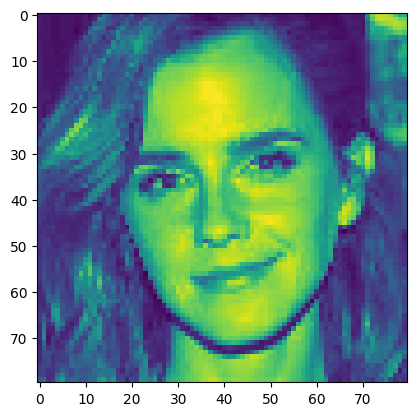

In [ ]:
plt.imshow(imagen_color2)

In [ ]:
model.predict(imagen2/225)

1/1 [==============================] - 0s 28ms/step


array([[0.7728]], dtype=float32)